In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cieff_chip_load = np.loadtxt('/home/krish.shah/GW_Lensing/FF_Computation/NEW_FF/SP/chieff_chip_Pair.txt')

In [5]:
FF_MV_IQ = []

for i in range(len(cieff_chip_load)):
    A = np.loadtxt('/home/krish.shah//GW_Lensing/FF_Computation/NEW_FF/SP/FF_Values_SP_ NO_HM'+str(cieff_chip_load[i,0])+'_'+str(cieff_chip_load[i,1])+'_'+str(q_inj)+'_'+str(l_inj)+'.txt', dtype=object)
    FF_MV_IQ.append(float(A[0][0]))


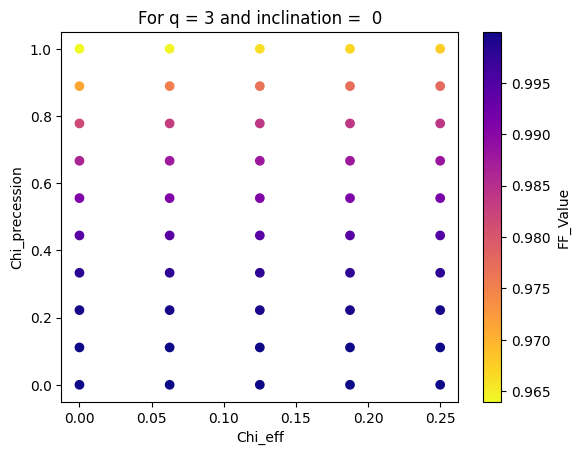

In [6]:

plt.scatter(cieff_chip_load[:, 0], cieff_chip_load[:, 1], c=FF_MV_IQ, cmap='plasma_r')
cbar = plt.colorbar()
cbar.set_label('FF_Value')
plt.xlabel('Chi_eff')
plt.ylabel('Chi_precession')
a = l_inj/np.pi
if abs(l_inj) == 0:
    symbolic_q = '0'
elif abs(a) < 1:
    a = np.pi/l_inj
    symbolic_q = r'$\frac{\pi}{' + str(int(a)) + '}$'
elif abs(a) > 1:
    a = l_inj/np.pi
    symbolic_q = str(int(a)) + r'$ \pi ' +  '}$'
plt.title('For q = %i and inclination =  {}'.format(symbolic_q)%(1/q_inj))
plt.show()

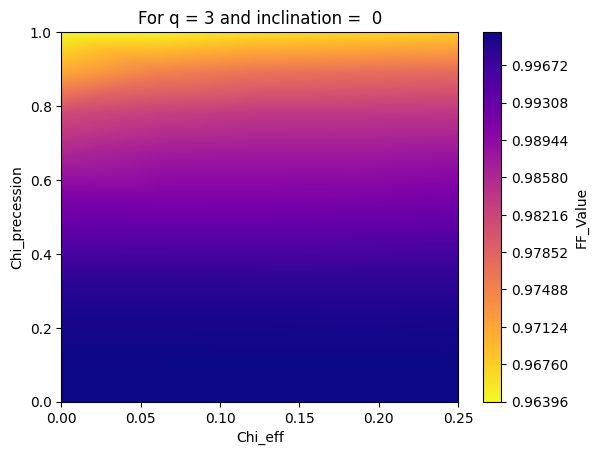

In [7]:
plt.tricontourf(cieff_chip_load[:, 0], cieff_chip_load[:, 1], FF_MV_IQ,1000,alpha = 1,cmap = 'plasma_r')
cbar = plt.colorbar()
cbar.set_label('FF_Value')
plt.xlabel('Chi_eff')
plt.ylabel('Chi_precession')
a = l_inj/np.pi
if abs(l_inj) == 0:
    symbolic_q = '0'
elif abs(a) < 1:
    a = np.pi/l_inj
    symbolic_q = r'$\frac{\pi}{' + str(int(a)) + '}$'
elif abs(a) > 1:
    a = l_inj/np.pi
    symbolic_q = str(int(a)) + r'$ \pi ' +  '}$'
plt.title('For q = %i and inclination =  {}'.format(symbolic_q)%(1/q_inj))
plt.show()

In [3]:
q_inj = 1/3 #mass ratio injected
l_inj = 0
chi_eff_inj = np.linspace(0,q_inj/(1+q_inj),5)
chi_p_inj =   np.linspace(0,1,10)
coordinates = []
for i in range(len(chi_eff_inj)):
    for j in range(len(chi_p_inj)):
        coordinates.append((chi_eff_inj[i], chi_p_inj[j]))
coordinates = np.array(coordinates)


np.savetxt('chieff_chip_Pair_q0.txt',coordinates)

In [4]:
cieff_chip_load = np.loadtxt('/home/krish.shah/GW_Lensing/FF_Computation/NEW_FF/SP/plotting/chieff_chip_Pair_q0.txt')

In [11]:
phi_c = []

for i in range(len(cieff_chip_load)):
    A = np.loadtxt('/home/krish.shah//GW_Lensing/FF_Computation/NEW_FF/SP/FF_Values_SP_ NO_HM'+str(cieff_chip_load[i,0])+'_'+str(cieff_chip_load[i,1])+'_'+str(q_inj)+'_'+str(l_inj)+'.txt', dtype=object)
    input_s = (A[0][5])
    output_string = input_s[:-1]
    phi_c.append(-1/(float(output_string)/np.pi))

    

In [12]:
import matplotlib.ticker as ticker

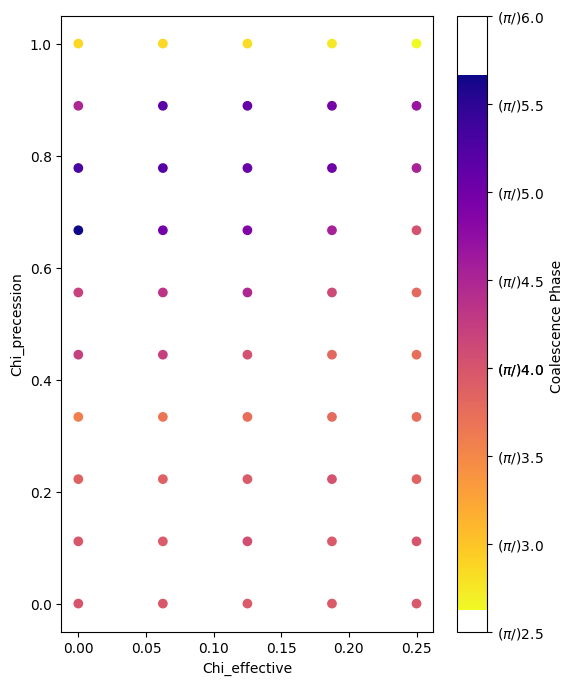

In [13]:
#coordinates = np.array(coordinates)
plt.figure(figsize = (6,8))
plt.scatter(cieff_chip_load[:, 0], cieff_chip_load[:, 1], c=phi_c, cmap='plasma_r')
cbar = plt.colorbar()


ticks = cbar.get_ticks()

# Add your specific tick value (e.g., 0.75) to the list of ticks
specific_tick = 4
ticks = np.append(ticks, specific_tick)

# Sort the tick values in ascending order
ticks = np.sort(ticks)
cbar.set_ticks(ticks)

# Create a FixedLocator with the updated tick positions
tick_locator = ticker.FixedLocator(ticks)

# Set the tick locator for the colorbar
cbar.locator = tick_locator
tick_round = np.round(ticks, decimals=1)

tick_labels = [r'$ ( \pi / )$'+ str(t) for t in tick_round]
cbar.set_ticklabels(tick_labels)


plt.xlabel('Chi_effective')
plt.ylabel('Chi_precession')
cbar.set_label(r'Coalescence Phase ')
plt.show()